In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("DARWIN.csv")
data.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [52]:
pendowns = data[["num_of_pendown1", "num_of_pendown2"]]
pendowns.corr()

,num_of_pendown1,num_of_pendown2
num_of_pendown1,1.000000,0.502867
num_of_pendown2,0.502867,1.000000


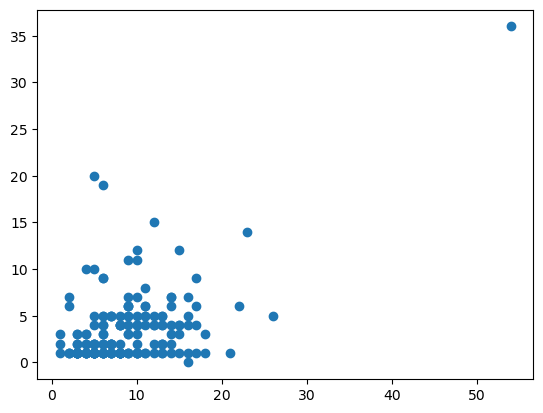

In [53]:
pendown1 = data["num_of_pendown1"]
pendown2 = data["num_of_pendown2"]

plt.scatter(pendown1, pendown2)

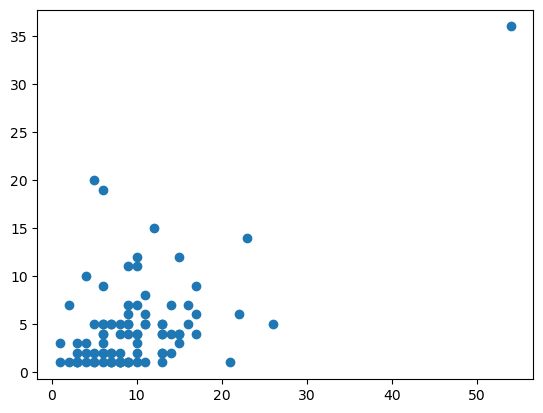

In [54]:
pendowns_class = data[["num_of_pendown1", "num_of_pendown2", "class"]]
pendowns_P = pendowns_class[pendowns_class["class"] == "P"].drop(columns=["class"])
pendowns_P.corr()

pendown1_P = pendowns_P["num_of_pendown1"]
pendown2_P = pendowns_P["num_of_pendown2"]

plt.scatter(pendown1_P, pendown2_P)

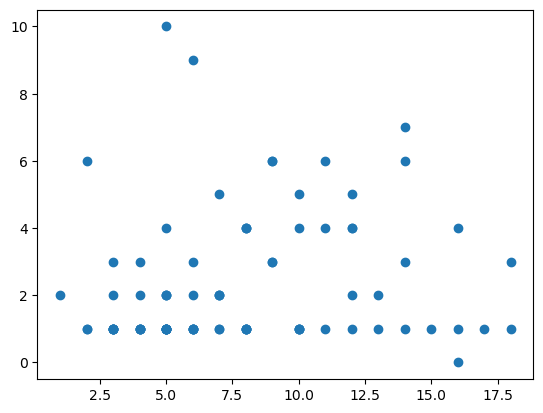

In [55]:
pendowns_H = pendowns_class[pendowns_class["class"] == "H"].drop(columns=["class"])
pendowns_H.corr()

pendown1_H = pendowns_H["num_of_pendown1"]
pendown2_H = pendowns_H["num_of_pendown2"]

plt.scatter(pendown1_H, pendown2_H)

In [56]:
import sklearn.naive_bayes
import re
import random

In [57]:
r = re.compile("num_of_pendown*")
nums = list(filter(r.match, data.columns))
nums = random.sample(nums, 10)
display(nums)

['num_of_pendown22',
 'num_of_pendown1',
 'num_of_pendown13',
 'num_of_pendown24',
 'num_of_pendown11',
 'num_of_pendown5',
 'num_of_pendown3',
 'num_of_pendown6',
 'num_of_pendown25',
 'num_of_pendown21']

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

pendown_cols = [col for col in data.columns if col.startswith("num_of_pendown")]

r = re.compile("num_of_pendown*")
nums = list(filter(r.match, data.columns))
pendown_features = random.sample(nums, 10)

other_features = [col for col in data.columns if col != "class"]
random_features = np.random.choice(other_features, 10, replace=False)

X_pendown = data[pendown_features]
X_random = data[random_features]
y = data["class"]

gnb = GaussianNB()

X_train_p, X_test_p, y_train, y_test = train_test_split(X_pendown, y, test_size=0.3, random_state=42)
gnb.fit(X_train_p, y_train)
y_pred_p = gnb.predict(X_test_p)
accuracy_pendown_split = accuracy_score(y_test, y_pred_p)

X_train_r, X_test_r, y_train, y_test = train_test_split(X_random, y, test_size=0.3, random_state=42)
gnb.fit(X_train_r, y_train)
y_pred_r = gnb.predict(X_test_r)
accuracy_random_split = accuracy_score(y_test, y_pred_r)

cv_scores_pendown = cross_val_score(gnb, X_pendown, y, cv=10, scoring='accuracy')
cv_scores_random = cross_val_score(gnb, X_random, y, cv=10, scoring='accuracy')

print("=== Train/Test Split Accuracy ===")
print("Pendown features (10):", accuracy_pendown_split)
print("Random features (10): ", accuracy_random_split)

print("\n=== Cross-Validation Accuracy (10 folds) ===")
print("Pendown features (10):", cv_scores_pendown.mean())
print("Random features (10): ", cv_scores_random.mean())


=== Train/Test Split Accuracy ===
Pendown features (10): 0.8113207547169812
Random features (10):  0.8301886792452831

=== Cross-Validation Accuracy (10 folds) ===
Pendown features (10): 0.7859477124183007
Random features (10):  0.8316993464052287


In [59]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)

X_train_p, X_test_p, y_train, y_test = train_test_split(X_pendown, y, test_size=0.3, random_state=42)
log_reg.fit(X_train_p, y_train)
y_pred_p = log_reg.predict(X_test_p)
accuracy_pendown_split = accuracy_score(y_test, y_pred_p)

X_train_r, X_test_r, y_train, y_test = train_test_split(X_random, y, test_size=0.3, random_state=42)
log_reg.fit(X_train_r, y_train)
y_pred_r = log_reg.predict(X_test_r)
accuracy_random_split = accuracy_score(y_test, y_pred_r)

cv_scores_pendown = cross_val_score(log_reg, X_pendown, y, cv=10, scoring='accuracy')
cv_scores_random = cross_val_score(log_reg, X_random, y, cv=10, scoring='accuracy')

print("=== Train/Test Split Accuracy ===")
print("Pendown features (10):", accuracy_pendown_split)
print("Random features (10): ", accuracy_random_split)

print("\n=== Cross-Validation Accuracy (10 folds) ===")
print("Pendown features (10):", cv_scores_pendown.mean())
print("Random features (10): ", cv_scores_random.mean())

=== Train/Test Split Accuracy ===
Pendown features (10): 0.6792452830188679
Random features (10):  0.8113207547169812

=== Cross-Validation Accuracy (10 folds) ===
Pendown features (10): 0.7513071895424837
Random features (10):  0.8150326797385621
